# **Task 2 - Model Building and Training**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger
# Assuming this class is defined in scripts/
from load_data import LoadData
from data_preparation import DataPreparation
from model_explain import ModelExplainer

logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

# Load the datasets

In [21]:
# Create instances
load_fraud = LoadData('../data/processed_fraud_data.csv', logger=logger)
load_credit = LoadData('../data/creditcard.csv', logger=logger)
# Load the datasets
fraud_data = load_fraud.load_dataset().set_index('user_id')
credit_data = load_credit.load_dataset()

# Explore the few rows

In [22]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
fraud_data.head()

,Unnamed: 0.1,Unnamed: 0,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,purchase_delay,hour_of_day,day_of_week,ip_int,country,user_transaction_frequency,device_transaction_frequency,user_transaction_velocity,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
user_id,,,,,,,,,,,,,,,,,,,,,,,,
247547,0,634,2015-06-28 03:00:34,2015-08-09 03:57:29,0.549607,KIXYSVCHIPQBR,-0.363124,1.677886e+07,0,-0.413800,-1.231124,1.487911,16778864,Australia,0.0,-0.259874,-0.232945,False,True,False,False,False,True,False
220737,1,635,2015-01-28 14:21:11,2015-02-11 20:28:28,-1.197335,PKYOWQKWGJNJI,0.101168,1.684205e+07,0,-1.180852,1.229002,-0.505034,16842045,Thailand,0.0,-0.259874,-0.232943,False,True,False,False,False,False,False
390400,2,636,2015-03-19 20:49:09,2015-04-11 23:41:23,0.385831,LVCSXLISZHVUO,-0.479197,1.684366e+07,0,-0.936126,1.663142,0.989675,16843656,China,0.0,0.116936,-0.232944,False,False,False,True,False,False,True
69592,3,637,2015-02-24 06:11:57,2015-05-23 16:40:14,0.986342,UHAUHNXXUADJE,-0.363124,1.693873e+07,0,0.867086,0.650149,0.989675,16938732,China,0.0,-0.259874,-0.232946,True,False,False,False,False,False,False
174987,4,638,2015-07-07 12:58:11,2015-11-03 04:04:30,0.767974,XPGPMOHIDRMGE,0.449387,1.697198e+07,0,1.700633,-1.086411,-1.003270,16971984,Thailand,0.0,-0.259874,-0.232946,False,True,False,False,False,False,False


# Understand the shapes

In [24]:
credit_data.shape, fraud_data.shape

((284807, 31), (129146, 24))

# Check any missing values

In [25]:
print(credit_data.isnull().sum())
print(fraud_data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Unnamed: 0.1                    0
Unnamed: 0                      0
signup_time                     0
purchase_time                   0
purchase_value                  0
device_id                       0
age                             0
ip_address                      0
class                           0
purchase_delay                  0
hour_of_day                     0
day_of_week                     0
ip_int                          0
country                         0
user_transaction_frequency      0
device_transaction_frequency    0
user_transaction_velocity       0
source_Direct                   0
sou

# 

In [26]:
fraud_data = fraud_data.drop(columns=['signup_time', 'purchase_time', 'device_id', 'country', 'source_Direct', 'source_SEO', 'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari', 'sex_M'])

# Data Preparation

- For creditcard dataset (target column 'Class')

In [27]:
# Assuming fraud_data_creditcard is the DataFrame for the credit card dataset
_creditcard = DataPreparation(credit_data, target_column='Class')
_creditcard.train_test_split(test_size=0.2, random_state=42)

# Retrieving the train and test sets
X_train_cc, X_test_cc, y_train_cc, y_test_cc = _creditcard.get_train_test_data()

Data split into training and testing sets successfully.


- For Fraud_Data dataset (target column 'class')

In [28]:
# Assuming fraud_data_fraud is the DataFrame for the fraud dataset
_fraud = DataPreparation(fraud_data, target_column='class')
_fraud.train_test_split(test_size=0.2, random_state=42)

# Retrieving the train and test sets
X_train_fd, X_test_fd, y_train_fd, y_test_fd = _fraud.get_train_test_data()

Data split into training and testing sets successfully.


# Model Selection

In [29]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # Disable CUDA

# Import the class
from model_pipeline import ModelPipeline

2024-10-25 00:16:26.219244: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-25 00:16:26.226183: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-25 00:16:26.244386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-25 00:16:26.270779: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-25 00:16:26.278484: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-25 00:16:26.299560: I tensorflow/core/platform/cpu_feature_gu

# Model Training and Evaluation on the e-commerce fruad dataset

In [11]:
# Create instance of the pipeline
model_pipeline = ModelPipeline(X_train_fd, X_test_fd, y_train_fd, y_test_fd)

# add models
model_pipeline.add_models()

# Train and evaluate, logging with MLflow
best_model, best_model_name = model_pipeline.train_and_evaluate()

# Save the best model
model_pipeline.save_best_models(best_model, best_model_name, 'fraud')

Tuning hyperparameters for Random Forest...
Random Forest best parameters: {'classifier__max_depth': 5, 'classifier__n_estimators': 100}
Tuning hyperparameters for Gradient Boosting...
Gradient Boosting best parameters: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 100}
Random Forest took 8.99 seconds to train


2024/10/24 23:23:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'random_forest' already exists. Creating a new version of this model...
Created version '4' of model 'random_forest'.


Random Forest model trained and logged with MLflow
Gradient Boosting took 28.48 seconds to train


2024/10/24 23:24:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'gradient_boosting' already exists. Creating a new version of this model...
Created version '4' of model 'gradient_boosting'.


Gradient Boosting model trained and logged with MLflow
808/808 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


2024/10/24 23:25:33 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


LSTM took 66.26 seconds to train


2024/10/24 23:25:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'lstm' already exists. Creating a new version of this model...
Created version '4' of model 'lstm'.


LSTM model trained and logged with MLflow
808/808 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/home/neba/Desktop/Data_Engineering/KAMI/Week-8 & 9/Fraud-Detection/.env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
2024/10/24 23:26:00 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


CNN took 22.79 seconds to train


2024/10/24 23:26:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


CNN model trained and logged with MLflow
Random Forest best model saved.


Registered model 'cnn' already exists. Creating a new version of this model...
Created version '4' of model 'cnn'.


# Get the results 

In [12]:
results_fraud, y_probs_fraud = model_pipeline.get_results()

In [13]:
pd.DataFrame(results_fraud).T

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Random Forest,0.956833,1.0,0.535997,0.697914,0.833505
Gradient Boosting,0.956833,1.0,0.535997,0.697914,0.833478
LSTM,0.956833,1.0,0.535997,0.697914,0.829606
CNN,0.906969,0.0,0.000000,0.000000,0.500000


# Model Training and Evaluation on the creditcard dataset

In [14]:
# Create instance of the pipeline
model_pipeline = ModelPipeline(X_train_cc, X_test_cc, y_train_cc, y_test_cc)

# add models
model_pipeline.add_models()

# Train and evaluate, logging with MLflow
best_model, best_model_name = model_pipeline.train_and_evaluate()

# Save the best model
model_pipeline.save_best_models(best_model, best_model_name, 'creditcard')

Tuning hyperparameters for Random Forest...
Random Forest best parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Tuning hyperparameters for Gradient Boosting...
Gradient Boosting best parameters: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 100}
Random Forest took 243.16 seconds to train


2024/10/24 23:50:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'random_forest' already exists. Creating a new version of this model...
Created version '5' of model 'random_forest'.


Random Forest model trained and logged with MLflow
Gradient Boosting took 349.57 seconds to train


2024/10/24 23:56:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'gradient_boosting' already exists. Creating a new version of this model...
Created version '5' of model 'gradient_boosting'.


Gradient Boosting model trained and logged with MLflow
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


2024/10/25 00:00:02 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


LSTM took 232.63 seconds to train


2024/10/25 00:00:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'lstm' already exists. Creating a new version of this model...
Created version '5' of model 'lstm'.


LSTM model trained and logged with MLflow
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


2024/10/25 00:01:03 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


CNN took 56.20 seconds to train


2024/10/25 00:01:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


CNN model trained and logged with MLflow
LSTM best model saved.


Registered model 'cnn' already exists. Creating a new version of this model...
Created version '5' of model 'cnn'.


# Get the results

In [15]:
results_creditcard, y_probs_credicard = model_pipeline.get_results()

In [16]:
pd.DataFrame(results_creditcard).T

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Random Forest,0.999561,0.962025,0.775510,0.858757,0.958027
Gradient Boosting,0.999403,0.984848,0.663265,0.792683,0.928369
LSTM,0.999368,0.816327,0.816327,0.816327,0.971100
CNN,0.997683,0.414141,0.836735,0.554054,0.939799


# **Task 3 - Model Explainability**

- Using SHAP and LIME for Explainability of the model trained with E-commerce dataset

In [30]:
import joblib
import shap
model = joblib.load('../data/random_forest_fraud_best_model.pkl')  # Load the saved model

In [31]:
import shap

In [32]:
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(max_depth=5))])

In [33]:
type(model)

sklearn.pipeline.Pipeline

In [34]:
model = model.steps[-1][1]

# Create SHAP explainer

In [35]:
explainer = shap.TreeExplainer(model)

In [36]:
explainer

# Calculate SHAP values for all samples

In [37]:
shap_values = explainer.shap_values(X_test_fd)

In [38]:
import shap
shap.initjs()

In [39]:
# Sample only a small number of rows, such as the top 100 samples
sample_indices = shap_values[0:100]  # Adjust the range based on your dataset

# Choose a specific index from the subsample
sample_index = 1  # Update this based on the index you want

# Plot SHAP force plot for the subsampled data
shap.plots.force(explainer.expected_value[sample_index], shap_values[sample_index])

Generating SHAP explanations...


<Figure size 1500x400 with 0 Axes>

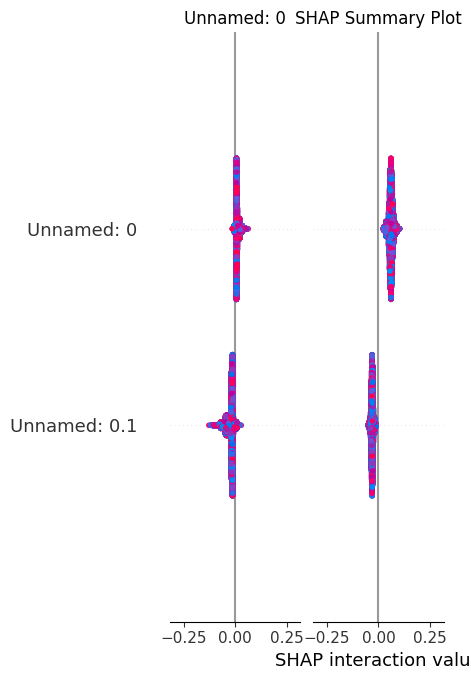

Generating LIME explanations...


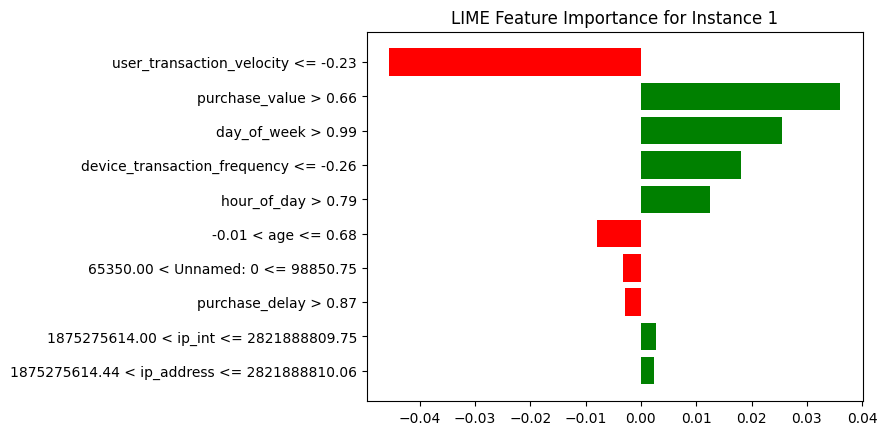

Generating SHAP explanations...


<Figure size 1500x400 with 0 Axes>

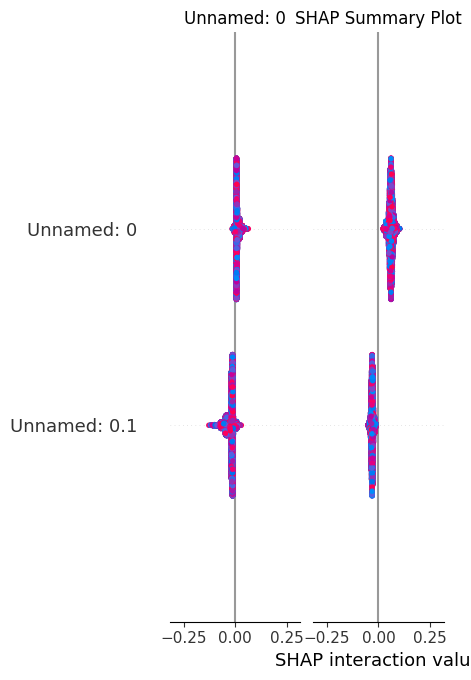

Generating LIME explanations...


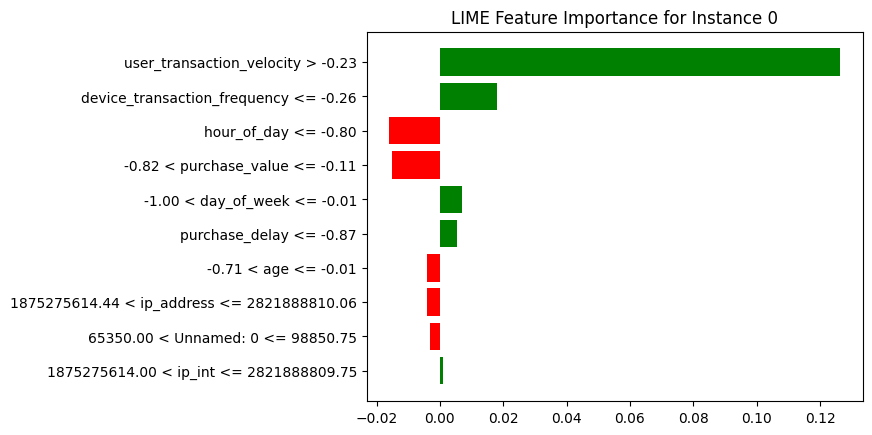

In [42]:
# Create instance of the class
fraud_explainer = ModelExplainer('../data/random_forest_fraud_best_model.pkl', X_test_fd)

 # Explains the first instance in the dataset
fraud_explainer.explain_model(instance_idx=1) 
 # Explains the first instance in the dataset
fraud_explainer.explain_model(instance_idx=0) 

In [43]:
import shap
print(shap.__version__)

0.46.0
